In [1]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Keep 26 frames before label=1 and the label=1 frame; discard original data
def load_gesture_data(directory):
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            print(f"Loading category: {category}")
            data_files = []
            label_files = []

            for filename in os.listdir(category_path):
                if filename.endswith('.npy') and 'data' in filename:
                    data_files.append(filename)
                if filename.endswith('.npy') and 'label' in filename:
                    label_files.append(filename)
            
            data_files.sort()
            label_files.sort()

            for i, (data_file, label_file) in enumerate(zip(data_files, label_files)):
                data_path = os.path.join(category_path, data_file)
                label_path = os.path.join(category_path, label_file)
                
                data = np.load(data_path)
                label = np.load(label_path)

                print(f"data_loaded: {data_file}")
                print(f"label_loaded: {label_file}")

                first_one_index = np.where(label.flatten() == 1)[0][0]
                start_index = max(0, first_one_index - 26)
                end_index = first_one_index

                pre_data = data[:, :, :, start_index:end_index]
                    
                label_one_data = data[:, :, :, label.flatten() == 1]

                filtered_data = np.concatenate((pre_data, label_one_data), axis=-1)

                filtered_data_filename = f"{os.path.splitext(data_file)[0]}_filtered.npy"
                np.save(os.path.join(category_path, filtered_data_filename), filtered_data)
                print(f"Saved filtered data to {filtered_data_filename}")

                os.remove(data_path)
                print(f"Removed data: {data_path}")
                os.remove(label_path)
                print(f"Removed label: {label_path}")


In [4]:
# Process Domain 0 (General Environment)
load_gesture_data('data_raw/general_rawdata')

Loading category: DoublePat
data_loaded: data_PatPat_0001_2024_08_22_13_11_53.h5.npy
label_loaded: labels_PatPat_0001_2024_08_22_13_11_53.h5.npy
Saved filtered data to data_PatPat_0001_2024_08_22_13_11_53.h5_filtered.npy
Removed data: data_raw/general_rawdata\DoublePat\data_PatPat_0001_2024_08_22_13_11_53.h5.npy
Removed label: data_raw/general_rawdata\DoublePat\labels_PatPat_0001_2024_08_22_13_11_53.h5.npy
data_loaded: data_PatPat_0002_2024_08_22_13_13_24.h5.npy
label_loaded: labels_PatPat_0002_2024_08_22_13_13_24.h5.npy
Saved filtered data to data_PatPat_0002_2024_08_22_13_13_24.h5_filtered.npy
Removed data: data_raw/general_rawdata\DoublePat\data_PatPat_0002_2024_08_22_13_13_24.h5.npy
Removed label: data_raw/general_rawdata\DoublePat\labels_PatPat_0002_2024_08_22_13_13_24.h5.npy
data_loaded: data_PatPat_0003_2024_08_22_13_13_50.h5.npy
label_loaded: labels_PatPat_0003_2024_08_22_13_13_50.h5.npy
Saved filtered data to data_PatPat_0003_2024_08_22_13_13_50.h5_filtered.npy
Removed data: d

In [5]:
# Process Domain 1 (Bathroom Environment)
load_gesture_data('data_raw/bath_rawdata')

Loading category: DoublePat
data_loaded: data_PatPat_0001_2024_08_22_19_51_43.h5.npy
label_loaded: labels_PatPat_0001_2024_08_22_19_51_43.h5.npy
Saved filtered data to data_PatPat_0001_2024_08_22_19_51_43.h5_filtered.npy
Removed data: data_raw/bath_rawdata\DoublePat\data_PatPat_0001_2024_08_22_19_51_43.h5.npy
Removed label: data_raw/bath_rawdata\DoublePat\labels_PatPat_0001_2024_08_22_19_51_43.h5.npy
data_loaded: data_PatPat_0002_2024_08_22_19_51_50.h5.npy
label_loaded: labels_PatPat_0002_2024_08_22_19_51_50.h5.npy
Saved filtered data to data_PatPat_0002_2024_08_22_19_51_50.h5_filtered.npy
Removed data: data_raw/bath_rawdata\DoublePat\data_PatPat_0002_2024_08_22_19_51_50.h5.npy
Removed label: data_raw/bath_rawdata\DoublePat\labels_PatPat_0002_2024_08_22_19_51_50.h5.npy
data_loaded: data_PatPat_0003_2024_08_22_19_51_55.h5.npy
label_loaded: labels_PatPat_0003_2024_08_22_19_51_55.h5.npy
Saved filtered data to data_PatPat_0003_2024_08_22_19_51_55.h5_filtered.npy
Removed data: data_raw/bath

In [6]:
# Load dataset (from path)
def load_gesture_path(directory):
    file_paths = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            print(f"Loading category: {category}")
            for filename in os.listdir(category_path):
                if filename.endswith('.npy') and 'data' in filename:
                    file_paths.append((category, os.path.join(category_path, filename)))
    return file_paths

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
all_data_combined shape: (17825, 71680)


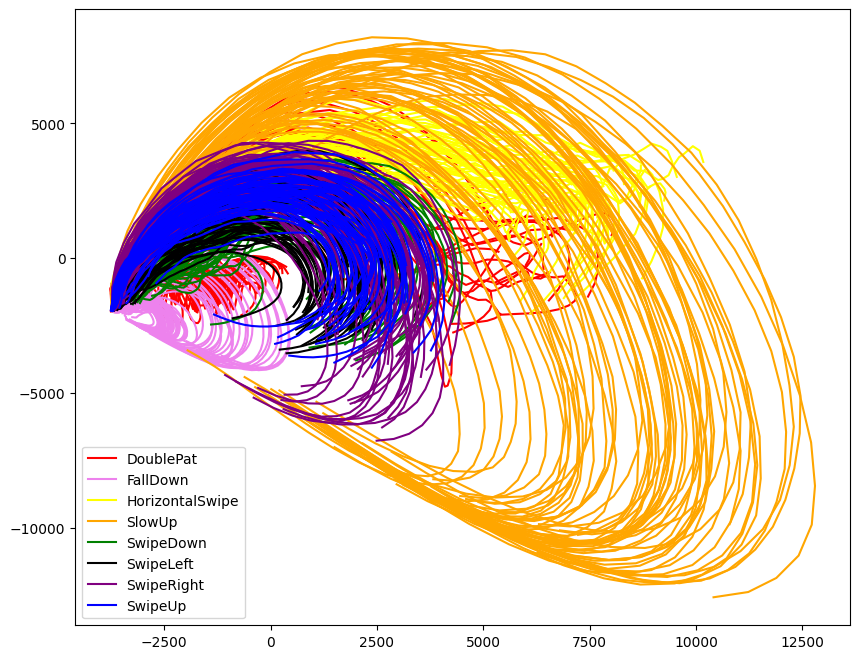

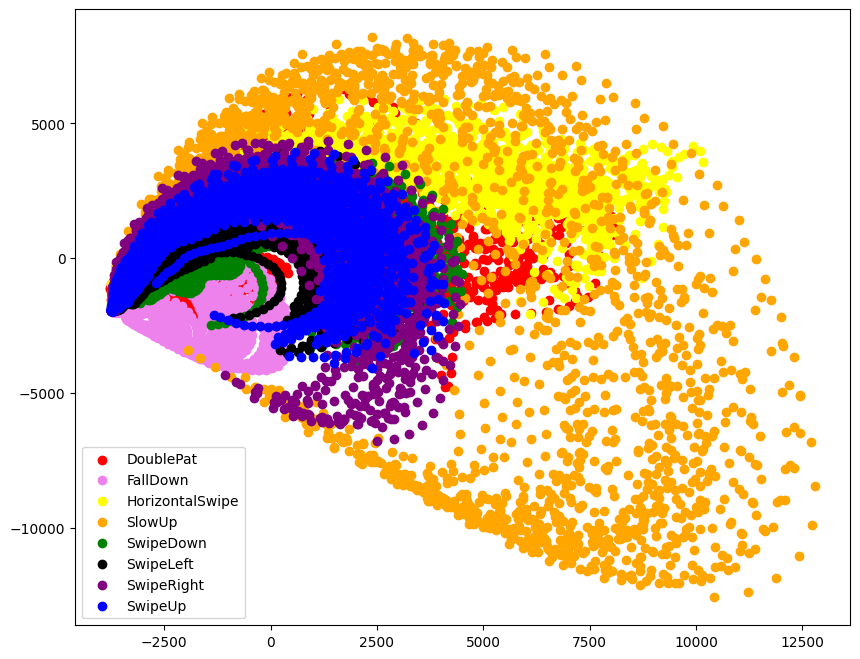

In [7]:
# Load processed data for Domain 0 (General Environment)
gesture_data_path = load_gesture_path('data_raw/general_rawdata')

# PCA
TimeSp = 35
pca = decomposition.PCA(n_components=2)
all_data = []
labels = []

for path in gesture_data_path:
    label, data_path = path
    a = np.load(data_path)
    if a.shape[-1] < TimeSp:
        print(f"Skipping {data_path}, not enough data for TimeSp")
        continue
    
    D = []
    for i in range(100000):
        if i + TimeSp >= a.shape[-1]:
            break
        D.append(a[:, :, :, i:i+TimeSp])

    D = np.array(D).reshape([len(D), -1, TimeSp]).reshape([len(D), -1])
    all_data.append(D)
    labels.extend([label] * len(D))

all_data_combined = np.concatenate(all_data, axis=0)
print('all_data_combined shape:', all_data_combined.shape)

pca.fit(all_data_combined)

plt.figure(figsize=(10, 8))

unique_labels = np.unique(labels)

color_map = {
    'DoublePat': [1, 0, 0, 1],          # Red
    'SwipeDown': [0, 0.5, 0, 1],        # Green
    'SwipeUp': [0, 0, 1, 1],            # Blue
    'SlowUp': [1, 0.65, 0, 1],          # Orange
    'HorizontalSwipe': [1, 1, 0, 1],    # Yellow
    'SwipeLeft': [0, 0, 0, 1],          # Black
    'FallDown': [0.93, 0.51, 0.93, 1],  # Violet
    'SwipeRight': [0.5, 0, 0.5, 1],     # Purple
}

plotted_labels = set()

for i, D in enumerate(all_data):
    Dim2 = pca.transform(D)
    label = gesture_data_path[i][0]
    if label not in plotted_labels:
        plt.plot(Dim2[:, 0], Dim2[:, 1], color=color_map[label], label=label)
        plotted_labels.add(label)
    else:
        plt.plot(Dim2[:, 0], Dim2[:, 1], color=color_map[label])

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10, 8))
plotted_labels = set()

for i, D in enumerate(all_data):
    Dim2 = pca.transform(D)
    label = gesture_data_path[i][0]

    if label not in plotted_labels:
        plt.scatter(Dim2[:, 0], Dim2[:, 1], color=color_map[label], label=label)
        plotted_labels.add(label)
    else:
        plt.scatter(Dim2[:, 0], Dim2[:, 1], color=color_map[label])

plt.legend(loc='best')
plt.show()

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
all_data_combined shape: (17605, 71680)


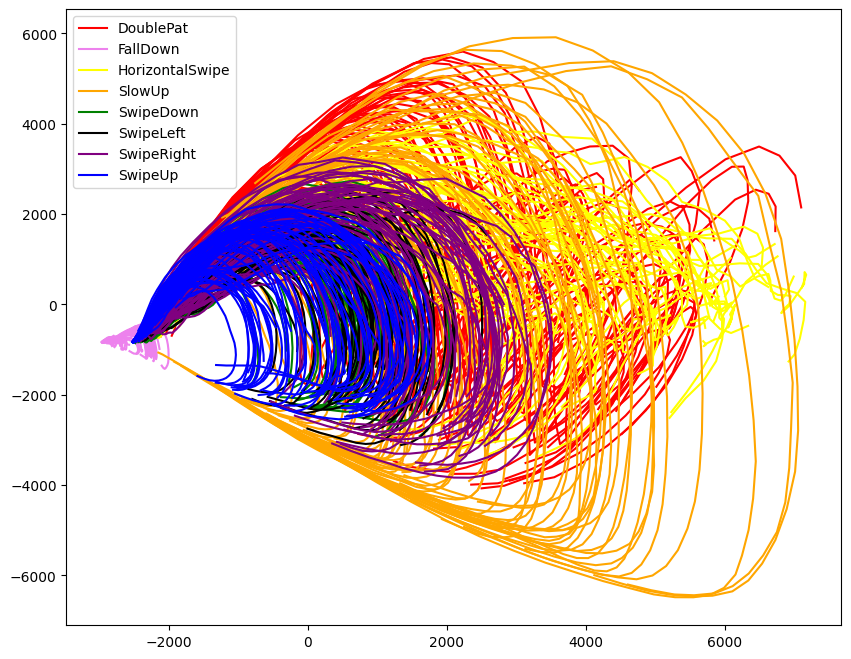

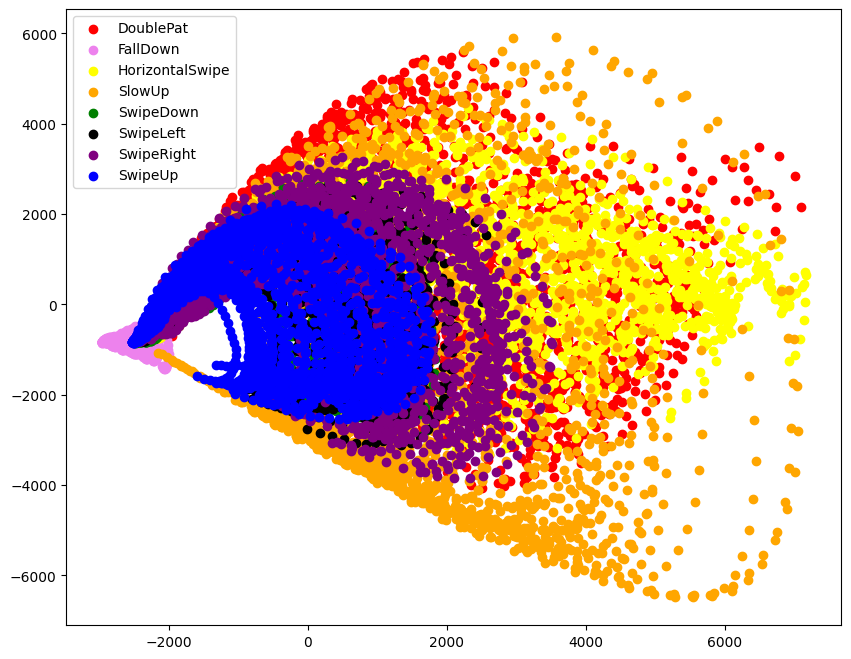

In [8]:
# Load processed data for Domain 1 (Bathroom Environment)
gesture_data_path = load_gesture_path('data_raw/bath_rawdata')

# PCA
TimeSp = 35
pca = decomposition.PCA(n_components=2)
all_data = []
labels = []

for path in gesture_data_path:
    label, data_path = path
    a = np.load(data_path)

    D = []
    for i in range(100000):
        if i + TimeSp >= a.shape[-1]:
            break
        D.append(a[:, :, :, i:i+TimeSp])

    D = np.array(D).reshape([len(D), -1, TimeSp]).reshape([len(D), -1])
    all_data.append(D)
    labels.extend([label] * len(D))

all_data_combined = np.concatenate(all_data, axis=0)
print('all_data_combined shape:', np.shape(all_data_combined))

pca.fit(all_data_combined)

plt.figure(figsize=(10, 8))

unique_labels = np.unique(labels)

color_map = {
    'DoublePat': [1, 0, 0, 1],          # Red
    'SwipeDown': [0, 0.5, 0, 1],        # Green
    'SwipeUp': [0, 0, 1, 1],            # Blue
    'SlowUp': [1, 0.65, 0, 1],          # Orange
    'HorizontalSwipe': [1, 1, 0, 1],    # Yellow
    'SwipeLeft': [0, 0, 0, 1],          # Black
    'FallDown': [0.93, 0.51, 0.93, 1],  # Violet
    'SwipeRight': [0.5, 0, 0.5, 1],     # Purple
}

plotted_labels = set()

for i, D in enumerate(all_data):
    Dim2 = pca.transform(D)
    label = gesture_data_path[i][0]
    if label not in plotted_labels:
        plt.plot(Dim2[:, 0], Dim2[:, 1], color=color_map[label], label=label)
        plotted_labels.add(label)
    else:
        plt.plot(Dim2[:, 0], Dim2[:, 1], color=color_map[label])

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10, 8))
plotted_labels = set()

for i, D in enumerate(all_data):
    Dim2 = pca.transform(D)
    label = gesture_data_path[i][0]

    if label not in plotted_labels:
        plt.scatter(Dim2[:, 0], Dim2[:, 1], color=color_map[label], label=label)
        plotted_labels.add(label)
    else:
        plt.scatter(Dim2[:, 0], Dim2[:, 1], color=color_map[label])

plt.legend(loc='best')
plt.show()

## Split into training, testing, and validation sets

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import shutil

In [10]:
os.rename("data_raw/general_rawdata", "data_raw/general_preprocessed_data")
os.rename("data_raw/bath_rawdata", "data_raw/bath_preprocessed_data")

In [11]:
# Read gesture data from path
def load_gesture_path(directory):
    file_paths = []
    labels = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if len(os.listdir(category_path))!=1:
            if os.path.isdir(category_path):
                print(f"Loading category: {category}")
                for filename in os.listdir(category_path):
                    if filename.endswith('.npy'):
                        file_paths.append((category, os.path.join(category_path, filename)))
                        labels.append(category)  
    return file_paths, labels

In [12]:
def copy_files(file_paths, base_dir):
    for category, file_path in file_paths:
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            os.makedirs(category_dir)
        shutil.copy(file_path, category_dir)

In [13]:
# Load the processed data (includes 26 frames before label=1 and the label=1 frame)
gesture_data_path, gesture_label = load_gesture_path('data_raw/general_preprocessed_data')
print(gesture_data_path)

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
[('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0001_2024_08_22_13_11_53.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0002_2024_08_22_13_13_24.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0003_2024_08_22_13_13_50.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0004_2024_08_22_13_13_59.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0005_2024_08_22_13_14_05.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data_PatPat_0006_2024_08_22_13_14_12.h5_filtered.npy'), ('DoublePat', 'data_raw/general_preprocessed_data\\DoublePat\\data

In [14]:
# Split the Domain_0 gesture dataset into training (80%), validation (10%), and test (10%) sets,
# then copy the corresponding files into separate directories under 'traindata_general'.
os.mkdir('traindata_general')
train_paths, test_paths, train_labels, test_labels = train_test_split(
    gesture_data_path, gesture_label, test_size=0.1, random_state=42, stratify=gesture_label
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.1/0.9, random_state=42, stratify=train_labels
)

copy_files(train_paths, 'traindata_general\\train')
copy_files(val_paths, 'traindata_general\\validation')
copy_files(test_paths, 'traindata_general\\test')

In [15]:
# Load the processed data (includes 26 frames before label=1 and the label=1 frame)
gesture_data_path, gesture_label = load_gesture_path('data_raw/bath_preprocessed_data')
print(gesture_data_path)

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
[('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0001_2024_08_22_19_51_43.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0002_2024_08_22_19_51_50.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0003_2024_08_22_19_51_55.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0004_2024_08_22_19_52_10.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0005_2024_08_22_19_52_16.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0006_2024_08_22_19_52_22.h5_filtered.npy'), ('DoublePat', 'data_raw/bath_preprocessed_data\\DoublePat\\data_PatPat_0007_2024_08_

In [21]:
# Split the Domain_1 gesture dataset into training (20%), validation (40%), and test (40%) sets,
# then copy the corresponding files into separate directories under 'traindata_bath'.
os.mkdir('traindata_bath')

train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    gesture_data_path, gesture_label, test_size=0.4, random_state=42, stratify=gesture_label
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels, test_size=2/3, random_state=42, stratify=train_val_labels
)

copy_files(train_paths, 'traindata_bath/train')
copy_files(val_paths, 'traindata_bath/validation')
copy_files(test_paths, 'traindata_bath/test')

In [17]:
def traindata_concate(directory):
    """
    Load and concatenate gesture data from a directory structured by class folders.

    This function reads .npy files from each category subfolder in the given directory.
    If a file has exactly 35 time steps (shape = (35, 32, 32, 2)), it is transposed and added as-is.
    Otherwise, a sliding window approach is used to extract sequences of length `TimeSp`.

    Args:
        directory (str): Path to the root directory containing class-wise folders of .npy files.

    Returns:
        tuple: A tuple of (gesture_data, labels) where:
            - gesture_data (np.ndarray): Array of shape (N, 2, 32, 32, T) or (N, C, H, W, T)
            - labels (np.ndarray): Array of class labels corresponding to each sequence
    """
    gesture_data = []
    labels = []
    TimeSp = 35
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            print(f"Loading category: {category}")
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                if filename.endswith('.npy'):
                    data = np.load(file_path)
                    
                if data.shape == (35, 32, 32, 2):
                    data = np.transpose(data, [3, 1, 2, 0])
                    gesture_data.append(data)
                    labels.append(category)
                    
                elif data.shape[-1] < TimeSp:
                    print(f"Skipping {file_path}, not enough data for TimeSp")
                    continue
                
                else:
                    for i in range(100000):
                        if i + TimeSp >= data.shape[-1]:
                            break
                        gesture_data.append(data[:, :, :, i:i+TimeSp])
                        labels.append(category)
    return np.array(gesture_data), np.array(labels)

In [18]:
# Load gesture data and labels from train, test, and validation folders using traindata_concate function.
# Transform data shape from (N, C, H, W, T) to (N*T, H, W, C) for model input.
# Repeat labels for each time step to align with expanded data.
# Save the processed data and labels as .npy files in 'traindata_general_concate' directory.
x_train, y_train = traindata_concate('traindata_general\\train')
x_train = np.transpose(x_train, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_train = np.repeat(y_train, 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
x_test, y_test = traindata_concate('traindata_general\\test')
x_test = np.transpose(x_test, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_test = np.repeat(y_test, 35)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
x_val, y_val = traindata_concate('traindata_general\\validation')
x_val = np.transpose(x_val, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_val = np.repeat(y_val, 35)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

os.mkdir('traindata_general_concate')
np.save('traindata_general_concate/data_general_train.npy', x_train)
np.save('traindata_general_concate/data_general_test.npy', x_test)
np.save('traindata_general_concate/data_general_val.npy', x_val)

np.save('traindata_general_concate/label_general_train.npy', y_train)
np.save('traindata_general_concate/label_general_test.npy', y_test)
np.save('traindata_general_concate/label_general_val.npy', y_val)

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_train shape: (498120, 32, 32, 2)
y_train shape: (498120,)
Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_test shape: (63175, 32, 32, 2)
y_test shape: (63175,)
Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_val shape: (62580, 32, 32, 2)
y_val shape: (62580,)


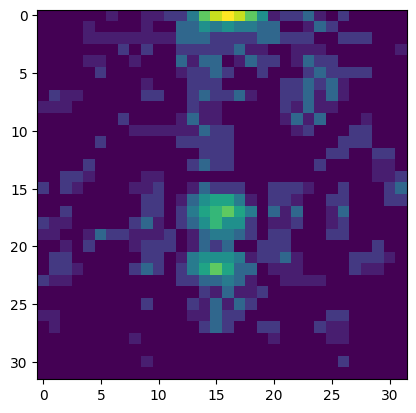

In [19]:
plt.imshow(x_train[0,:,:,0])

In [22]:
# Load gesture data and labels from train, test, and validation folders using traindata_concate function.
# Transform data shape from (N, C, H, W, T) to (N*T, H, W, C) for model input.
# Repeat labels for each time step to align with expanded data.
# Save the processed data and labels as .npy files in 'traindata_bath_concate' directory.
x_train, y_train = traindata_concate('traindata_bath\\train')
x_train = np.transpose(x_train, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_train = np.repeat(y_train, 35)
print('x_train shape:', x_train.shape)
x_test, y_test = traindata_concate('traindata_bath\\test')
x_test = np.transpose(x_test, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_test = np.repeat(y_test, 35)
print('x_test shape:', x_test.shape)
x_val, y_val = traindata_concate('traindata_bath\\validation')
x_val = np.transpose(x_val, [0, 4, 2, 3, 1]).reshape(-1, 32, 32, 2)
y_val = np.repeat(y_val, 35)
print('x_val shape:', x_val.shape)
os.mkdir('traindata_bath_concate')

np.save('traindata_bath_concate/data_bath_train.npy', x_train)
np.save('traindata_bath_concate/data_bath_test.npy', x_test)
np.save('traindata_bath_concate/data_bath_val.npy', x_val)

np.save('traindata_bath_concate/label_bath_train.npy', y_train)
np.save('traindata_bath_concate/label_bath_test.npy', y_test)
np.save('traindata_bath_concate/label_bath_val.npy', y_val)

Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_train shape: (123795, 32, 32, 2)
Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_test shape: (244300, 32, 32, 2)
Loading category: DoublePat
Loading category: FallDown
Loading category: HorizontalSwipe
Loading category: SlowUp
Loading category: SwipeDown
Loading category: SwipeLeft
Loading category: SwipeRight
Loading category: SwipeUp
x_val shape: (248080, 32, 32, 2)
